<a href="https://colab.research.google.com/github/RaffyJO/machine-learning-2024/blob/main/ML-Week4-Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas**

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, `voice.csv`.
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  - Menggunakan data `spam.csv`
  - Fitur `CountVectorizer` dengan mengaktifkan `stop_words`
  - Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  - Menggunakan data `spam.csv`
  - Fitur `TF-IDF` dengan mengaktifkan stop_words
  - Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  - Berikan kesimpulan fitur mana yang terbaik pada kasus data `spam.csv`

**1. Klasifikasi SVM untuk data suara**

**Langkah 1 - Import Library yang dibutuhkan**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Langkah 2 - Membaca data voice.csv**

In [15]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Langkah 3 - Analisis bentuk data**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [18]:
# Pengecekan data null
df.isnull().sum()

,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


In [19]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Dari analisis data tersebut, didapatkan data label bertipe object, sehingga perlu dilakukan encoding

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

<Axes: >

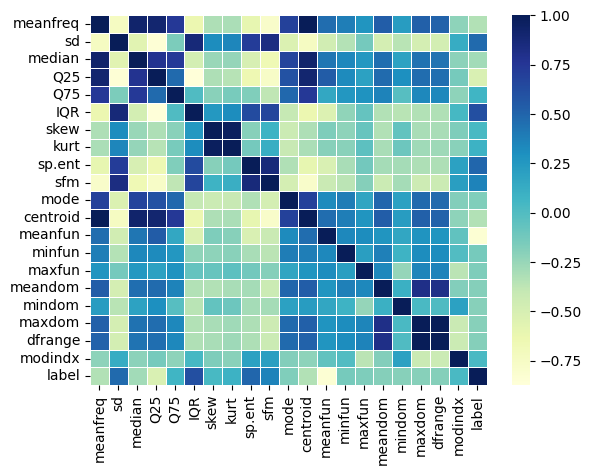

In [22]:
sns.heatmap(df.corr(),cmap='YlGnBu',linewidths=0.5)

**Langkah 4 - Membuat model SVM**

In [24]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['label'],axis=1))
scaled_features

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [25]:
# melakukan split data menjadi data training dan data testing dengan perbandingan 80:20
from sklearn.model_selection import train_test_split

X = scaled_features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

In [26]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

**Langkah 5 - Melakukan prediksi**

In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9794952681388013
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       299
           1       0.97      0.99      0.98       335

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



**2. Klasifikasi Multinomial Naive Bayes (Count Vectorizer)**

**Langkah 1 - membaca data spam.csv**

In [33]:
df_spam = pd.read_csv('spam.csv', encoding='latin-1')
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
df_spam.info()
df_spam.describe()
df_spam.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


**Langkah 2 - Penghapusan data yang tidak diperlukan**
<br>
Karena terdapat data yang bernilai "NaN", maka perlu dilakukan penghapusan data tersebut

In [35]:
df_spam.drop(df_spam.iloc[:,2:],axis=1,inplace=True)
df_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Langkah 3 - Pemisahan data training dan data testing**

In [94]:
X = df_spam['v2']
y = df_spam['v1']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

**Langkah 4 - Transformasi data dengan CountVectorizer**
<br>
CountVectorizer digunakan untuk mengubah data teks menjadi vektor. Pada kasus ini, data teks yang digunakan adalah data SMS yang menggunakan bahasa inggris sehingga perlu dilakukan pengubahan stop_words menjadi bahasa inggris

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

print(X_train)
X_train = vectorizer.fit_transform(X_train)
print(X_train)
X_test = vectorizer.transform(X_test)

2747                         Ya had just now.onion roast.
4779    Sen told that he is going to join his uncle fi...
338                                Sorry, I'll call later
507     You should know now. So how's anthony. Are you...
3312    Huh... Hyde park not in mel ah, opps, got conf...
                              ...                        
4149    I only work from mon to thurs but Sat i cant l...
1890    Ok but knackered. Just came home and went to s...
350     Nah can't help you there, I've never had an ip...
79      Its not the same here. Still looking for a job...
3927       Babe ? I lost you ... Will you try rebooting ?
Name: v2, Length: 4457, dtype: object
  (0, 7431)	1
  (0, 3786)	1
  (0, 4816)	1
  (0, 5650)	1
  (1, 5845)	1
  (1, 6755)	1
  (1, 3106)	1
  (1, 3749)	1
  (1, 6938)	1
  (1, 2805)	1
  (1, 1664)	1
  (2, 6151)	1
  (2, 4071)	1
  (2, 3944)	1
  (3, 3874)	1
  (3, 980)	1
  (3, 1484)	1
  (3, 4470)	1
  (3, 7047)	1
  (3, 5783)	1
  (3, 2764)	1
  (3, 4980)	1
  (3, 5551)	1
  (

**Langkah 5 - Membuat model Multinomial Naive Bayes**

In [96]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train,y_train)

MultinomialNB()

**Langkah 6 - Melakukan prediksi**

In [97]:
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9829596412556054
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       970
        spam       0.94      0.93      0.93       145

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



**3. Klasifikasi Multinomial Naive Bayes (TF-IDF Vectorizer)**

**Langkah 1 - Membaca data spam.csv**

In [40]:
data_spam = pd.read_csv('spam.csv', encoding='latin-1')
data_spam.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [42]:
data_spam.info()
data_spam.describe()
data_spam.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


**Langkah 2 - Penghapusan data yang tidak diperlukan**

In [43]:
data_spam.drop(data_spam.iloc[:,2:],axis=1,inplace=True)

**Langkah 3 - Pemisahan data training dan data testing**

In [78]:
X = data_spam['v2']
y = data_spam['v1']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

**Langkah 4 - Transformasi data dengan TF-IDF Vectorizer**
<br>
TF-IDF Vectorizer digunakan untuk mengubah data teks menjadi vektor. Pada kasus ini, data teks yang digunakan adalah data SMS yang menggunakan bahasa inggris sehingga perlu dilakukan pengubahan stop_words menjadi bahasa inggris.

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

print(X_train)
X_train = tfidf.fit_transform(X_train)
print(X_train)
X_test = tfidf.transform(X_test)

2747                         Ya had just now.onion roast.
4779    Sen told that he is going to join his uncle fi...
338                                Sorry, I'll call later
507     You should know now. So how's anthony. Are you...
3312    Huh... Hyde park not in mel ah, opps, got conf...
                              ...                        
4149    I only work from mon to thurs but Sat i cant l...
1890    Ok but knackered. Just came home and went to s...
350     Nah can't help you there, I've never had an ip...
79      Its not the same here. Still looking for a job...
3927       Babe ? I lost you ... Will you try rebooting ?
Name: v2, Length: 4457, dtype: object
  (0, 5650)	0.6003145239033847
  (0, 4816)	0.6296270466389338
  (0, 3786)	0.27212031166232103
  (0, 7431)	0.41126972963274117
  (1, 1664)	0.4330917045156944
  (1, 2805)	0.46148049450946904
  (1, 6938)	0.38443811907566494
  (1, 3749)	0.33937121848040874
  (1, 3106)	0.24830506711605294
  (1, 6755)	0.30976096554878835
  (1, 5

**Langkah 5 - Membuat model Multinomial Naive Bayes**

In [46]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train,y_train)

MultinomialNB()

**Langkah 6 - Melakukan prediksi**

In [47]:
y_pred = nb_classifier.predict(X_test)

tf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", tf_accuracy)

# Generate a classification report
tf_report = classification_report(y_test, y_pred)
print("Classification Report:\n", tf_report)

Accuracy: 0.9739910313901345
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       970
        spam       1.00      0.80      0.89       145

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



**Kesimpulan**
<br>
Akurasi dari penggunaan CountVectorizer dan TF-IDF Vectorizer:
<br>
- CountVectorizer : 0.9829596412556054
- TF-IDF Vectorizer : 0.9739910313901345

Akurasi dari penggunaan CountVectorizer dan TF-IDF Vectorizer relatif sama meskipun akurasi pada CountVectorizer lebih tinggi sedikit.

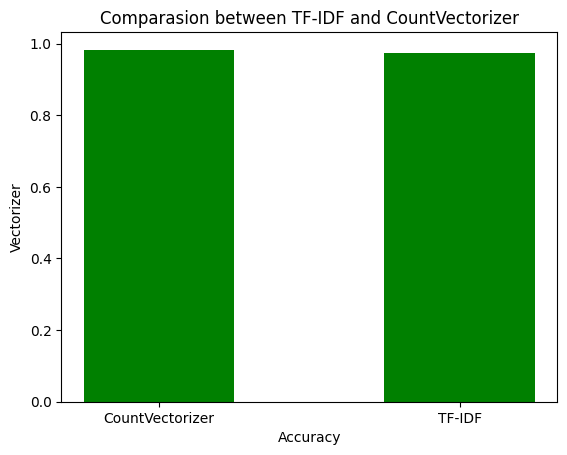

In [49]:
plt.bar(['CountVectorizer','TF-IDF'], [accuracy,tf_accuracy], color='green',width=0.5)
plt.title('Comparasion between TF-IDF and CountVectorizer')
plt.xlabel('Accuracy')
plt.ylabel('Vectorizer')
plt.show()